In [1]:
%matplotlib inline

import numpy as np
import random
import requests as rq
import sys
import io
import re
import pandas as pd
import matplotlib.pyplot as plt
from gensim import models
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Elise\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elise\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Elise\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
model_fox = Word2Vec.load("./models/fox.model")
model_reuters = Word2Vec.load("./models/reuters.model")
model_the_hill = Word2Vec.load("./models/the_hill.model")
model_cnn = Word2Vec.load("./models/cnn.model")
model_nyt = Word2Vec.load("./models/nyt.model")

In [3]:
adjectives = ['disorganized', 'devious', 'impressionable', 'circumspect', 'impassive', 
             'aimless', 'effeminate', 'unfathomable', 'fickle', 'unprincipled', 'inoffensive', 
             'reactive', 'providential', 'resentful', 'bizarre', 'impractical',
             'sarcastic', 'misguided', 'imitative', 'pedantic', 'venomous', 'erratic', 'insecure', 
             'resourceful', 'neurotic', 'forgiving', 'profligate', 'whimsical', 'assertive', 
             'incorruptible', 'individualistic', 'faithless', 'disconcerting', 'barbaric', 
             'hypnotic', 'vindictive', 'observant', 'dissolute', 'frightening', 'complacent', 
             'boisterous', 'pretentious', 'disobedient', 'tasteless', 'sedentary', 
             'sophisticated', 'regimental', 'mellow', 'deceitful', 'impulsive', 'playful', 
             'sociable', 'methodical', 'willful', 'idealistic', 'boyish', 'callous', 'pompous', 
             'unchanging', 'crafty', 'punctual', 'compassionate', 'intolerant', 'challenging', 
             'scornful', 'possessive', 'conceited', 'imprudent', 'dutiful', 'lovable', 
             'disloyal', 'dreamy', 'appreciative', 'forgetful', 'unrestrained', 'forceful', 
             'submissive', 'predatory', 'fanatical', 'illogical', 'tidy', 'aspiring', 'studious', 
             'adaptable', 'conciliatory', 'artful', 'thoughtless', 'deceptive', 'frugal', 
             'reflective', 'insulting', 'unreliable', 'stoic', 'hysterical', 'rustic', 
             'inhibited', 'outspoken', 'unhealthy', 'ascetic', 'skeptical', 'painstaking', 
             'contemplative', 'leisurely', 'sly', 'mannered', 'outrageous', 'lyrical', 
             'placid', 'cynical', 'irresponsible', 'vulnerable', 'arrogant', 'persuasive', 
             'perverse', 'steadfast', 'crisp', 'envious', 'naive', 'greedy', 'presumptuous', 
             'obnoxious', 'irritable', 'dishonest', 'discreet', 'sporting', 'hateful', 
             'ungrateful', 'frivolous', 'reactionary', 'skillful', 'cowardly', 'sordid', 
             'adventurous', 'dogmatic', 'intuitive', 'bland', 'indulgent', 'discontented', 
             'dominating', 'articulate', 'fanciful', 'discouraging', 'treacherous', 
             'repressed', 'moody', 'sensual', 'unfriendly', 'optimistic', 'clumsy', 
             'contemptible', 'focused', 'haughty', 'morbid', 'disorderly', 'considerate', 
             'humorous', 'preoccupied', 'airy', 'impersonal', 'cultured', 'trusting', 
             'respectful', 'scrupulous', 'scholarly', 'superstitious', 'tolerant', 
             'realistic', 'malicious', 'irrational', 'sane', 'colorless', 'masculine', 
             'witty', 'inert', 'prejudiced', 'fraudulent', 'blunt', 'childish', 'brittle', 
             'disciplined', 'responsive', 'courageous', 'bewildered', 'courteous', 
             'stubborn', 'aloof', 'sentimental', 'athletic', 'extravagant', 'brutal', 
             'manly', 'cooperative', 'unstable', 'youthful', 'timid', 'amiable', 'retiring', 
             'fiery', 'confidential', 'relaxed', 'imaginative', 'mystical', 'shrewd', 
             'conscientious', 'monstrous', 'grim', 'questioning', 'lazy', 'dynamic', 
             'gloomy', 'troublesome', 'abrupt', 'eloquent', 'dignified', 'hearty', 'gallant', 
             'benevolent', 'maternal', 'paternal', 'patriotic', 'aggressive', 'competitive', 
             'elegant', 'flexible', 'gracious', 'energetic', 'tough', 'contradictory', 
             'shy', 'careless', 'cautious', 'polished', 'sage', 'tense', 'caring', 
             'suspicious', 'sober', 'neat', 'transparent', 'disturbing', 'passionate', 
             'obedient', 'crazy', 'restrained', 'fearful', 'daring', 'prudent', 'demanding', 
             'impatient', 'cerebral', 'calculating', 'amusing', 'honorable', 'casual',
             'sharing', 'selfish', 'ruined', 'spontaneous', 'admirable', 'conventional', 
             'cheerful', 'solitary', 'upright', 'stiff', 'enthusiastic', 'petty', 'dirty', 
             'subjective', 'heroic', 'stupid', 'modest', 'impressive', 'orderly', 'ambitious', 
             'protective', 'silly', 'alert', 'destructive', 'exciting', 'crude', 'ridiculous', 
             'subtle', 'mature', 'creative', 'coarse', 'passive', 'oppressed', 'accessible', 
             'charming', 'clever', 'decent', 'miserable', 'superficial', 'shallow', 'stern', 
             'winning', 'balanced', 'emotional', 'rigid', 'invisible', 'desperate', 'cruel', 
             'romantic', 'agreeable', 'hurried', 'sympathetic', 'solemn', 'systematic', 
             'vague', 'peaceful', 'humble', 'dull', 'expedient', 'loyal', 'decisive', 
             'arbitrary', 'earnest', 'confident', 'conservative', 'foolish', 'moderate', 
             'helpful', 'delicate', 'gentle', 'dedicated', 'hostile', 'generous', 'reliable', 
             'dramatic', 'precise', 'calm', 'healthy', 'attractive', 'artificial', 
             'progressive', 'odd', 'confused', 'rational', 'brilliant', 'intense', 
             'genuine', 'mistaken', 'driving', 'stable', 'objective', 'sensitive', 
             'neutral', 'strict', 'angry', 'profound', 'smooth', 'ignorant', 'thorough', 
             'logical', 'intelligent', 'extraordinary', 'experimental', 'steady', 
             'formal', 'faithful', 'curious', 'reserved', 'honest', 'busy', 'educated', 
             'liberal', 'friendly', 'efficient', 'sweet', 'surprising', 'mechanical', 
             'clean', 'critical', 'criminal', 'soft', 'proud', 'quiet', 'weak', 'anxious', 
             'solid', 'complex', 'grand', 'warm', 'slow', 'false', 'extreme', 'narrow', 
             'dependent', 'wise', 'organized', 'pure', 'directed', 'dry', 'obvious', 'popular', 
             'capable', 'secure', 'active', 'independent', 'ordinary', 'fixed', 'practical', 
             'serious', 'fair', 'understanding', 'constant', 'cold', 'responsible', 'deep', 
             'religious', 'private', 'simple', 'physical', 'original', 'working', 'strong', 
             'modern', 'determined', 'open', 'political', 'difficult', 'knowledge', 'kind']

In [4]:
gender = ["man", "woman", "girl", "boy"]

women_list = ['daughter', 'mother', 'woman', 'girl', 'female', 
              'sister', 'aunt', 'niece']
men_list = ['son', 'father', 'man', 'boy', 'male', 'brother',
            'uncle', 'nephew']

straight_list = ['heterosexual', 'straight']
lgbtq_list = ['gay', 'trans', 'bisexual', 'lesbian', 'queer']

trust_words = ['friend', 'love', 'family', 'parent', 'neighbor', 'babysitter', 'caregiver', 'trustworthy']
good_bad_words = ['smart', 'intelligent', 'clever', 'genius', 'successful', 'leader', 'power', 'bad', 'evil', 
                  'dumb', 'stupid']

In [5]:
def print_adj_dists(news_source, model, word_list, compare_wordlist):  # prints the top 5 words in 'compare_wordlist' nearest to the words in the wordlist for a given model
    # for each word, print a dataframe of the compare_wordlist words to that word
    for word in word_list:
        # build list of compare_wordlist word distances
        word_dists = []
        for ind in range(len(compare_wordlist)):
            adj = compare_wordlist[ind]
            try:
                dist = model.wv.distance(word, adj)
                word_dists.append([news_source, word, adj, dist])
            except:
                word_dists.append([news_source, word, adj, None])

        # create result dataframe and print output
        df = pd.DataFrame(word_dists, columns=['source','word', 'adj', 'dist'])
        df_sorted = df.sort_values(by='dist', ascending=True)
        display(df_sorted.head(5))
        
def print_word_dists_each_model(wordlist, compare_wordlist): # prints the top 5 words in 'compare_wordlist' nearest to the words in the wordlist for all 5 models
    print_adj_dists("Fox News", model_fox, wordlist, compare_wordlist)
    print_adj_dists("Reuters", model_reuters, wordlist, compare_wordlist)
    print_adj_dists("The Hill", model_the_hill, wordlist, compare_wordlist)
    print_adj_dists("NYT", model_nyt, wordlist, compare_wordlist)
    print_adj_dists("CNN", model_cnn, wordlist, compare_wordlist)
    
def find_avg_loc(model, wordlist): # given a wordlist, returns the average of the words' locations in a given model
    avg = [0]*100
    for i in range(0, len(wordlist)):
        avg += model.wv.get_vector(wordlist[i])
    avg /= len(wordlist)
    return avg

def find_avg_dists(news_source, model, wordlist_name, wordlist, compare_wordlist, print_output=True): # prints the top 5 words in 'compare_wordlist' that are nearest to the average location of the words in the wordlist for a given model, returns the list of adjectives and distances
    word_dists = []
    # find avg loc of wordlist
    avg_loc = find_avg_loc(model, wordlist)
    
    # for each compare_word, attempts to find distance from avg loc to compare word but throws an error if compare_word is not in model
    for ind in range(len(compare_wordlist)):
        compare_word = compare_wordlist[ind]
        try: 
            dist = abs(np.linalg.norm(avg_loc-model.wv.get_vector(compare_word)))
            word_dists.append([news_source, wordlist_name, compare_word, dist])
        except:
            word_dists.append([news_source, wordlist_name, compare_word, None])

    # create new dataframe to hold result, print if desired
    df = pd.DataFrame(word_dists, columns=['news_source', 'wordlist_name', 'compare_word', 'dist'])
    if print_output:
        df_sorted = df.sort_values(by='dist', ascending=True)
        print(df.shape)
        display(df_sorted.head())
    return df

def find_avg_dists_each_model(wordlist_name, wordlist, compare_wordlist): # prints the top 5 words in 'compare_wordlist' that are nearest to the average location of the words in the wordlist for all 5 models, returns the list of adjectives and distances
    
    dists = []
    dists.append(find_avg_dists("Fox", model_fox, wordlist_name, wordlist, compare_wordlist))
    dists.append(find_avg_dists("Reuters", model_reuters, wordlist_name, wordlist, compare_wordlist))
    dists.append(find_avg_dists("The Hill", model_the_hill, wordlist_name, wordlist, compare_wordlist))
    dists.append(find_avg_dists("NYT", model_nyt, wordlist_name, wordlist, compare_wordlist))
    dists.append(find_avg_dists("CNN", model_cnn, wordlist_name, wordlist, compare_wordlist))
    result = pd.concat(dists).reset_index(drop=True)
    return result
    
def find_avg_dists_compare(news_source, model, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist): # for 2 wordlists and mo, computes the average location and distances to words in 'compare_wordlist' then prints the adjectives nearest to each wordlist
    # find avg loc of wordlists and dists from avg loc to all 'compare_wordlist' words
    dists1 = find_avg_dists(news_source, model, wordlist_name1, wordlist1, compare_wordlist, print_output=False)
    dists2 = find_avg_dists(news_source, model, wordlist_name2, wordlist2, compare_wordlist, print_output=False)

    # print line helps to analyze for constant reference
    print("""\nif difference between dists is positive, association is stronger 
with wordlist2. if negative, association is stronger with wordlist1\n""")
    
    # create new dataframe for visual analysis
    diffs = pd.DataFrame()
    diffs['news_source'] = dists1['news_source']
    diffs['wordlist1'] = wordlist_name1
    diffs['wordlist2'] = wordlist_name2
    diffs['compare_word'] = dists1['compare_word']
    diffs['diff'] = dists1['dist']-dists2['dist']
    
    # print all of dataframe if small, otherwise print top and bottom 5
    df_sorted = diffs.sort_values(by='diff', ascending=False)
    display(df_sorted.head())
    if len(df_sorted) > 5:
        df_sorted = diffs.sort_values(by='diff', ascending=True)
        display(df_sorted.head())
    
def find_avg_dists_compare_each_model(wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist): # for 2 wordlists and all 5 models, computes the average location and distances to words in 'compare_wordlist' then prints the adjectives nearest to each wordlist
    find_avg_dists_compare("Fox News", model_fox, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_dists_compare("Reuters", model_reuters, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_dists_compare("The Hill", model_the_hill, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_dists_compare("NYT", model_nyt, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_dists_compare("CNN", model_cnn, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist) 
    
def find_avg_relative_dists(news_source, model, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist): # prints top 5 words associated with each wordlist using relative distance
    # find avg loc of wordlists and the dists from that avg loc to all 'compare_wordlist' words
    dists1 = find_avg_dists(news_source, model, wordlist_name1, wordlist1, compare_wordlist, print_output=False)
    dists2 = find_avg_dists(news_source, model, wordlist_name2, wordlist2, compare_wordlist, print_output=False)
    
    # compute relative distance: percentage of sum of distances relevant to each wordlist
    rel1 = dists1['dist']/(dists1['dist']+dists2['dist'])
    rel2 = dists2['dist']/(dists1['dist']+dists2['dist'])
    
    # construct new dataframe
    rels = pd.DataFrame()
    rels['news_source'] = dists1['news_source']
    rels['compare_word'] = dists1['compare_word']
    rels['wordlist1'] = wordlist_name1
    rels['rel_dist_1'] = rel1
    rels['wordlist2'] = wordlist_name2
    rels['rel_dist_2'] = rel2
    
    # print entire wordlist if small, otherwise print top 5 words most relatively close to each wordlist
    df_sorted = rels.sort_values(by='rel_dist_1', ascending=False)
    display(df_sorted.head())
    if len(df_sorted) > 5:
        df_sorted = rels.sort_values(by='rel_dist_2', ascending=False)
        display(df_sorted.head())
    print("\n")
    
    return rels
    
def find_rel_dists_compare_each_model(wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist): # prints top 5 words associated with each wordlist by relative distance, for all 5 models
    
    dists = []
    dists.append(find_avg_relative_dists("Fox News", model_fox, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append(find_avg_relative_dists("Reuters", model_reuters, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append(find_avg_relative_dists("The Hill", model_the_hill, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append(find_avg_relative_dists("NYT", model_nyt, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append(find_avg_relative_dists("CNN", model_cnn, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    result = pd.concat(dists).reset_index(drop=True)
    return result
    
def find_rel_dists_one_word(news_source, model, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist): # basically same as above but used to print output in a nicer format across all models
    dists1 = find_avg_dists(news_source, model, wordlist_name1, wordlist1, compare_wordlist, print_output=False)
    dists2 = find_avg_dists(news_source, model, wordlist_name2, wordlist2, compare_wordlist, print_output=False)
    
    rel1 = dists1['dist']/(dists1['dist']+dists2['dist'])
    rel2 = dists2['dist']/(dists1['dist']+dists2['dist'])
    
    rels = pd.DataFrame()
    rels['news_source'] = dists1['news_source']
    rels['compare_word'] = dists1['compare_word']
    rels['wordlist1'] = wordlist_name1
    rels['rel_dist_1'] = rel1
    rels['wordlist2'] = wordlist_name2
    rels['rel_dist_2'] = rel2
    
    return rels
    
def find_rel_dists_one_word_each_model(wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist): # prints relative distance between 2 wordlists for a single compare_word in one dataframe
    # concat result for each word into one dataframe
    dists = []
    dists.append( find_rel_dists_one_word("Fox News", model_fox, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append( find_rel_dists_one_word("Reuters", model_reuters, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append( find_rel_dists_one_word("The Hill", model_the_hill, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append( find_rel_dists_one_word("NYT", model_nyt, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append( find_rel_dists_one_word("CNN", model_cnn, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    result = pd.concat(dists).reset_index(drop=True)
    return result

In [6]:
find_avg_dists_each_model('lgbtq', lgbtq_list, adjectives)

(423, 4)


,news_source,wordlist_name,compare_word,dist
36,Fox,lgbtq,observant,1.712397
70,Fox,lgbtq,disloyal,1.789946
143,Fox,lgbtq,repressed,1.802095
56,Fox,lgbtq,callous,1.829779
306,Fox,lgbtq,solemn,1.835372


(423, 4)


,news_source,wordlist_name,compare_word,dist
6,Reuters,lgbtq,effeminate,2.242137
201,Reuters,lgbtq,mystical,2.761589
163,Reuters,lgbtq,scholarly,2.790210
286,Reuters,lgbtq,oppressed,2.791794
164,Reuters,lgbtq,superstitious,2.797564


(423, 4)


,news_source,wordlist_name,compare_word,dist
36,The Hill,lgbtq,observant,2.076949
2,The Hill,lgbtq,impressionable,2.204212
58,The Hill,lgbtq,unchanging,2.283309
216,The Hill,lgbtq,benevolent,2.302569
13,The Hill,lgbtq,resentful,2.306078


(423, 4)


,news_source,wordlist_name,compare_word,dist
6,NYT,lgbtq,effeminate,2.373287
76,NYT,lgbtq,submissive,2.566201
2,NYT,lgbtq,impressionable,2.597668
137,NYT,lgbtq,discontented,2.620934
51,NYT,lgbtq,sociable,2.668639


(423, 4)


,news_source,wordlist_name,compare_word,dist
143,CNN,lgbtq,repressed,2.186976
286,CNN,lgbtq,oppressed,2.210620
54,CNN,lgbtq,idealistic,2.245246
76,CNN,lgbtq,submissive,2.305716
126,CNN,lgbtq,ungrateful,2.306150


,news_source,wordlist_name,compare_word,dist
0,Fox,lgbtq,disorganized,2.175051
1,Fox,lgbtq,devious,2.096345
2,Fox,lgbtq,impressionable,1.932741
3,Fox,lgbtq,circumspect,2.177586
4,Fox,lgbtq,impassive,NaN
...,...,...,...,...
2110,CNN,lgbtq,open,3.361654
2111,CNN,lgbtq,political,3.910631
2112,CNN,lgbtq,difficult,3.656901
2113,CNN,lgbtq,knowledge,4.227357


In [7]:
plot_hh_df1 = find_rel_dists_compare_each_model('heterosexual', ['heterosexual'], 'homosexual', ['homosexual'], ['friend'])
plot_hh_df2 = find_rel_dists_compare_each_model('heterosexual', ['heterosexual'], 'homosexual', ['homosexual'], ['love'])
plot_hh_df3 = find_rel_dists_compare_each_model('heterosexual', ['heterosexual'], 'homosexual', ['homosexual'], ['babysitter'])
plot_hh_df4 = find_rel_dists_compare_each_model('heterosexual', ['heterosexual'], 'homosexual', ['homosexual'], ['trustworthy'])

,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Fox News,friend,heterosexual,0.456007,homosexual,0.543993


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Reuters,friend,heterosexual,0.501257,homosexual,0.498743


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,The Hill,friend,heterosexual,0.323169,homosexual,0.676831


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,NYT,friend,heterosexual,0.513547,homosexual,0.486453


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,CNN,friend,heterosexual,0.498055,homosexual,0.501945


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Fox News,love,heterosexual,0.46414,homosexual,0.53586


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Reuters,love,heterosexual,0.51281,homosexual,0.48719


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,The Hill,love,heterosexual,0.325465,homosexual,0.674535


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,NYT,love,heterosexual,0.508847,homosexual,0.491153


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,CNN,love,heterosexual,0.499347,homosexual,0.500653


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Fox News,babysitter,heterosexual,0.341398,homosexual,0.658602


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Reuters,babysitter,heterosexual,0.499013,homosexual,0.500987


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,The Hill,babysitter,heterosexual,0.247762,homosexual,0.752238


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,NYT,babysitter,heterosexual,0.505072,homosexual,0.494928


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,CNN,babysitter,heterosexual,0.500225,homosexual,0.499775


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Fox News,trustworthy,heterosexual,0.399536,homosexual,0.600464


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Reuters,trustworthy,heterosexual,0.504712,homosexual,0.495288


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,The Hill,trustworthy,heterosexual,0.329274,homosexual,0.670726


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,NYT,trustworthy,heterosexual,0.504647,homosexual,0.495353


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,CNN,trustworthy,heterosexual,0.490497,homosexual,0.509503


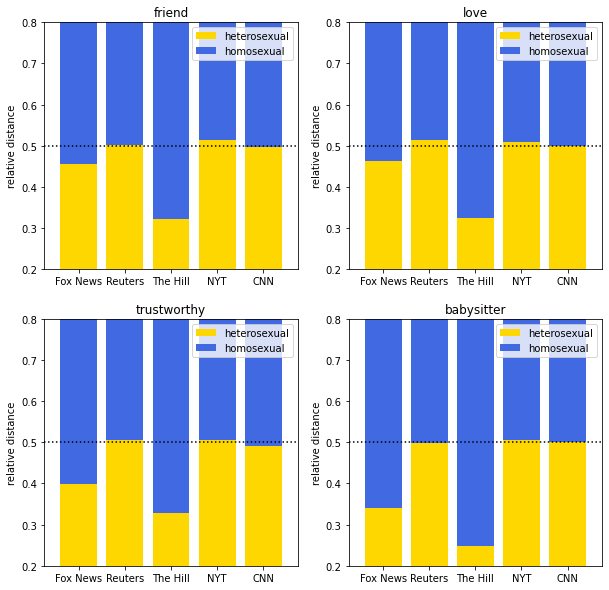

In [9]:
labels = plot_hh_df1['news_source']
group1_hh_dist = plot_hh_df1['rel_dist_1']
group2_hh_dist = plot_hh_df1['rel_dist_2']

group3_hh_dist = plot_hh_df2['rel_dist_1']
group4_hh_dist = plot_hh_df2['rel_dist_2']

group5_hh_dist = plot_hh_df3['rel_dist_1']
group6_hh_dist = plot_hh_df3['rel_dist_2']

group7_hh_dist = plot_hh_df4['rel_dist_1']
group8_hh_dist = plot_hh_df4['rel_dist_2']

fig, axs = plt.subplots(2, 2)

fig.set_figwidth(10)
fig.set_figheight(10)

axs[0,0].bar(labels, group1_hh_dist, label="heterosexual", color='gold')
axs[0,0].bar(labels, group2_hh_dist, label="homosexual", color = 'royalblue', bottom = group1_hh_dist)

axs[0,0].set_ylabel("relative distance")
axs[0,0].set_title("friend")
axs[0,0].legend()

axs[0,1].bar(labels, group3_hh_dist, label="heterosexual", color='gold')
axs[0,1].bar(labels, group4_hh_dist, label="homosexual", color = 'royalblue', bottom = group3_hh_dist)

axs[0,1].set_ylabel("relative distance")
axs[0,1].set_title("love")
axs[0,1].legend()

axs[1,1].bar(labels, group5_hh_dist, label="heterosexual", color='gold')
axs[1,1].bar(labels, group6_hh_dist, label="homosexual", color = 'royalblue', bottom = group5_hh_dist)

axs[1,1].set_ylabel("relative distance")
axs[1,1].set_title("babysitter")
axs[1,1].legend()

axs[1,0].bar(labels, group7_hh_dist, label="heterosexual", color='gold')
axs[1,0].bar(labels, group8_hh_dist, label="homosexual", color = 'royalblue', bottom = group7_hh_dist)

axs[1,0].set_ylabel("relative distance")
axs[1,0].set_title("trustworthy")
axs[1,0].legend()

axs[0,0].axhline(y=.5, color='black', linestyle=":")
axs[0,0].axis([-.75,4.75, .2,.8])

axs[1,1].axhline(y=.5, color='black', linestyle=":")
axs[1,1].axis([-.75,4.75, .2,.8])

axs[0,1].axhline(y=.5, color='black', linestyle=":")
axs[0,1].axis([-.75,4.75, .2,.8])

axs[1,0].axhline(y=.5, color='black', linestyle=":")
axs[1,0].axis([-.75,4.75, .2,.8])


plt.show()



In [10]:
plot_mw_df1 = find_rel_dists_compare_each_model('woman', ['woman'], 'man', ['man'], ['smart'])
plot_mw_df2 = find_rel_dists_compare_each_model('woman', ['woman'], 'man', ['man'], ['genius'])
plot_mw_df3 = find_rel_dists_compare_each_model('woman', ['woman'], 'man', ['man'], ['evil'])
plot_mw_df4 = find_rel_dists_compare_each_model('woman', ['woman'], 'man', ['man'], ['dumb'])

,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Fox News,smart,woman,0.504898,man,0.495102


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Reuters,smart,woman,0.539004,man,0.460996


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,The Hill,smart,woman,0.541172,man,0.458828


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,NYT,smart,woman,0.524313,man,0.475687


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,CNN,smart,woman,0.52533,man,0.47467


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Fox News,genius,woman,0.512022,man,0.487978


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Reuters,genius,woman,0.55682,man,0.44318


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,The Hill,genius,woman,0.531434,man,0.468566


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,NYT,genius,woman,0.552459,man,0.447541


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,CNN,genius,woman,0.542396,man,0.457604


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Fox News,evil,woman,0.499958,man,0.500042


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Reuters,evil,woman,0.5402,man,0.4598


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,The Hill,evil,woman,0.568575,man,0.431425


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,NYT,evil,woman,0.535364,man,0.464636


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,CNN,evil,woman,0.546578,man,0.453422


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Fox News,dumb,woman,0.498568,man,0.501432


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Reuters,dumb,woman,0.550123,man,0.449877


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,The Hill,dumb,woman,0.55559,man,0.44441


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,NYT,dumb,woman,0.550154,man,0.449846


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,CNN,dumb,woman,0.539011,man,0.460989


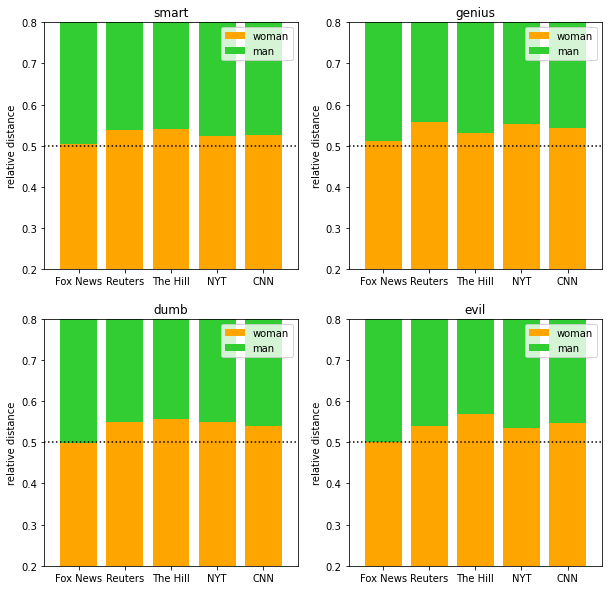

In [11]:

labels = plot_mw_df1['news_source']
group1_mw_dist = plot_mw_df1['rel_dist_1']
group2_mw_dist = plot_mw_df1['rel_dist_2']

group3_mw_dist = plot_mw_df2['rel_dist_1']
group4_mw_dist = plot_mw_df2['rel_dist_2']

group5_mw_dist = plot_mw_df3['rel_dist_1']
group6_mw_dist = plot_mw_df3['rel_dist_2']

group7_mw_dist = plot_mw_df4['rel_dist_1']
group8_mw_dist = plot_mw_df4['rel_dist_2']


fig, axs = plt.subplots(2, 2)



fig.set_figwidth(10)
fig.set_figheight(10)

axs[0,0].bar(labels, group1_mw_dist, label="woman", color='orange')
axs[0,0].bar(labels, group2_mw_dist, label="man", color = 'limegreen', bottom = group1_mw_dist)

axs[0,0].set_ylabel("relative distance")
axs[0,0].set_title("smart")
axs[0,0].legend()

axs[0,1].bar(labels, group3_mw_dist, label="woman", color='orange')
axs[0,1].bar(labels, group4_mw_dist, label="man", color = 'limegreen', bottom = group3_mw_dist)

axs[0,1].set_ylabel("relative distance")
axs[0,1].set_title("genius")
axs[0,1].legend()

axs[1,1].bar(labels, group5_mw_dist, label="woman", color='orange')
axs[1,1].bar(labels, group6_mw_dist, label="man", color = 'limegreen', bottom = group5_mw_dist)

axs[1,1].set_ylabel("relative distance")
axs[1,1].set_title("evil")
axs[1,1].legend()

axs[1,0].bar(labels, group7_mw_dist, label="woman", color='orange')
axs[1,0].bar(labels, group8_mw_dist, label="man", color = 'limegreen', bottom = group7_mw_dist)

axs[1,0].set_ylabel("relative distance")
axs[1,0].set_title("dumb")
axs[1,0].legend()

axs[0,0].axhline(y=.5, color='black', linestyle=":")
axs[0,0].axis([-.75,4.75, .2,.8])

axs[1,1].axhline(y=.5, color='black', linestyle=":")
axs[1,1].axis([-.75,4.75, .2,.8])

axs[0,1].axhline(y=.5, color='black', linestyle=":")
axs[0,1].axis([-.75,4.75, .2,.8])

axs[1,0].axhline(y=.5, color='black', linestyle=":")
axs[1,0].axis([-.75,4.75, .2,.8])

plt.show()

In [12]:
find_rel_dists_compare_each_model('heterosexual', ['heterosexual'], 'homosexual', ['homosexual'], adjectives)

,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
409,Fox News,religious,heterosexual,0.548270,homosexual,0.451730
125,Fox News,hateful,heterosexual,0.523506,homosexual,0.476494
301,Fox News,cruel,heterosexual,0.518326,homosexual,0.481674
96,Fox News,outspoken,heterosexual,0.516690,homosexual,0.483310
318,Fox News,conservative,heterosexual,0.512130,homosexual,0.487870


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
260,Fox News,cheerful,heterosexual,0.261465,homosexual,0.738535
76,Fox News,submissive,heterosexual,0.264853,homosexual,0.735147
145,Fox News,sensual,heterosexual,0.266496,homosexual,0.733504
2,Fox News,impressionable,heterosexual,0.271405,homosexual,0.728595
157,Fox News,airy,heterosexual,0.281501,homosexual,0.718499


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
125,Reuters,hateful,heterosexual,0.560957,homosexual,0.439043
90,Reuters,insulting,heterosexual,0.552124,homosexual,0.447876
168,Reuters,irrational,heterosexual,0.549710,homosexual,0.450290
130,Reuters,cowardly,heterosexual,0.543749,homosexual,0.456251
77,Reuters,predatory,heterosexual,0.543321,homosexual,0.456679


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
217,Reuters,maternal,heterosexual,0.461019,homosexual,0.538981
228,Reuters,shy,heterosexual,0.463770,homosexual,0.536230
234,Reuters,caring,heterosexual,0.463939,homosexual,0.536061
364,Reuters,educated,heterosexual,0.464006,homosexual,0.535994
180,Reuters,responsive,heterosexual,0.465867,homosexual,0.534133


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
256,The Hill,ruined,heterosexual,0.564488,homosexual,0.435512
125,The Hill,hateful,heterosexual,0.456960,homosexual,0.543040
374,The Hill,soft,heterosexual,0.439850,homosexual,0.560150
318,The Hill,conservative,heterosexual,0.423462,homosexual,0.576538
209,The Hill,gloomy,heterosexual,0.422991,homosexual,0.577009


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
44,The Hill,sedentary,heterosexual,0.220030,homosexual,0.779970
36,The Hill,observant,heterosexual,0.221306,homosexual,0.778694
2,The Hill,impressionable,heterosexual,0.225855,homosexual,0.774145
152,The Hill,morbid,heterosexual,0.237294,homosexual,0.762706
58,The Hill,unchanging,heterosexual,0.238682,homosexual,0.761318


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
33,NYT,barbaric,heterosexual,0.593748,homosexual,0.406252
130,NYT,cowardly,heterosexual,0.581793,homosexual,0.418207
56,NYT,callous,heterosexual,0.576700,homosexual,0.423300
17,NYT,misguided,heterosexual,0.566041,homosexual,0.433959
409,NYT,religious,heterosexual,0.564271,homosexual,0.435729


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
364,NYT,educated,heterosexual,0.474976,homosexual,0.525024
282,NYT,mature,heterosexual,0.475015,homosexual,0.524985
44,NYT,sedentary,heterosexual,0.479315,homosexual,0.520685
332,NYT,attractive,heterosexual,0.479391,homosexual,0.520609
354,NYT,intelligent,heterosexual,0.480958,homosexual,0.519042


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
301,CNN,cruel,heterosexual,0.561890,homosexual,0.438110
7,CNN,unfathomable,heterosexual,0.560070,homosexual,0.439930
130,CNN,cowardly,heterosexual,0.559186,homosexual,0.440814
53,CNN,willful,heterosexual,0.558838,homosexual,0.441162
33,CNN,barbaric,heterosexual,0.551194,homosexual,0.448806


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
364,CNN,educated,heterosexual,0.460315,homosexual,0.539685
331,CNN,healthy,heterosexual,0.471801,homosexual,0.528199
253,CNN,casual,heterosexual,0.476572,homosexual,0.523428
248,CNN,impatient,heterosexual,0.476904,homosexual,0.523096
296,CNN,balanced,heterosexual,0.477319,homosexual,0.522681


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Fox News,disorganized,heterosexual,0.321477,homosexual,0.678523
1,Fox News,devious,heterosexual,0.319671,homosexual,0.680329
2,Fox News,impressionable,heterosexual,0.271405,homosexual,0.728595
3,Fox News,circumspect,heterosexual,0.323034,homosexual,0.676966
4,Fox News,impassive,heterosexual,NaN,homosexual,NaN
...,...,...,...,...,...,...
2110,CNN,open,heterosexual,0.504127,homosexual,0.495873
2111,CNN,political,heterosexual,0.512228,homosexual,0.487772
2112,CNN,difficult,heterosexual,0.499308,homosexual,0.500692
2113,CNN,knowledge,heterosexual,0.509187,homosexual,0.490813


In [13]:
find_avg_dists_compare_each_model("g", ['homosexual'], "s", ['heterosexual'], trust_words)


if difference between dists is positive, association is stronger 
with wordlist2. if negative, association is stronger with wordlist1



,news_source,wordlist1,wordlist2,compare_word,diff
5,Fox News,g,s,babysitter,1.044846
6,Fox News,g,s,caregiver,0.869944
7,Fox News,g,s,trustworthy,0.718094
0,Fox News,g,s,friend,0.517679
2,Fox News,g,s,family,0.503104


,news_source,wordlist1,wordlist2,compare_word,diff
4,Fox News,g,s,neighbor,0.355416
3,Fox News,g,s,parent,0.379582
1,Fox News,g,s,love,0.433623
2,Fox News,g,s,family,0.503104
0,Fox News,g,s,friend,0.517679



if difference between dists is positive, association is stronger 
with wordlist2. if negative, association is stronger with wordlist1



,news_source,wordlist1,wordlist2,compare_word,diff
6,Reuters,g,s,caregiver,0.713720
3,Reuters,g,s,parent,0.346164
2,Reuters,g,s,family,0.264594
5,Reuters,g,s,babysitter,0.014315
0,Reuters,g,s,friend,-0.020360


,news_source,wordlist1,wordlist2,compare_word,diff
1,Reuters,g,s,love,-0.219754
4,Reuters,g,s,neighbor,-0.109958
7,Reuters,g,s,trustworthy,-0.080611
0,Reuters,g,s,friend,-0.020360
5,Reuters,g,s,babysitter,0.014315



if difference between dists is positive, association is stronger 
with wordlist2. if negative, association is stronger with wordlist1



,news_source,wordlist1,wordlist2,compare_word,diff
5,The Hill,g,s,babysitter,3.797679
0,The Hill,g,s,friend,3.205779
2,The Hill,g,s,family,3.203550
6,The Hill,g,s,caregiver,3.198820
3,The Hill,g,s,parent,3.147890


,news_source,wordlist1,wordlist2,compare_word,diff
7,The Hill,g,s,trustworthy,2.878633
1,The Hill,g,s,love,2.926828
4,The Hill,g,s,neighbor,2.939163
3,The Hill,g,s,parent,3.147890
6,The Hill,g,s,caregiver,3.198820



if difference between dists is positive, association is stronger 
with wordlist2. if negative, association is stronger with wordlist1



,news_source,wordlist1,wordlist2,compare_word,diff
6,NYT,g,s,caregiver,0.117778
3,NYT,g,s,parent,-0.027171
7,NYT,g,s,trustworthy,-0.072729
5,NYT,g,s,babysitter,-0.076561
4,NYT,g,s,neighbor,-0.104803


,news_source,wordlist1,wordlist2,compare_word,diff
2,NYT,g,s,family,-0.249085
0,NYT,g,s,friend,-0.193505
1,NYT,g,s,love,-0.126551
4,NYT,g,s,neighbor,-0.104803
5,NYT,g,s,babysitter,-0.076561



if difference between dists is positive, association is stronger 
with wordlist2. if negative, association is stronger with wordlist1



,news_source,wordlist1,wordlist2,compare_word,diff
6,CNN,g,s,caregiver,0.180360
3,CNN,g,s,parent,0.158790
7,CNN,g,s,trustworthy,0.107341
0,CNN,g,s,friend,0.026017
1,CNN,g,s,love,0.007966


,news_source,wordlist1,wordlist2,compare_word,diff
2,CNN,g,s,family,-0.191500
4,CNN,g,s,neighbor,-0.048969
5,CNN,g,s,babysitter,-0.002151
1,CNN,g,s,love,0.007966
0,CNN,g,s,friend,0.026017


In [14]:
find_rel_dists_compare_each_model("m", ['man'], "w", ['woman'], trust_words)

,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
6,Fox News,caregiver,m,0.535276,w,0.464724
5,Fox News,babysitter,m,0.525684,w,0.474316
3,Fox News,parent,m,0.513854,w,0.486146
1,Fox News,love,m,0.513282,w,0.486718
7,Fox News,trustworthy,m,0.512192,w,0.487808


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
4,Fox News,neighbor,m,0.486996,w,0.513004
0,Fox News,friend,m,0.497566,w,0.502434
2,Fox News,family,m,0.510731,w,0.489269
7,Fox News,trustworthy,m,0.512192,w,0.487808
1,Fox News,love,m,0.513282,w,0.486718


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
6,Reuters,caregiver,m,0.545781,w,0.454219
3,Reuters,parent,m,0.470261,w,0.529739
7,Reuters,trustworthy,m,0.463701,w,0.536299
2,Reuters,family,m,0.461905,w,0.538095
1,Reuters,love,m,0.451926,w,0.548074


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
5,Reuters,babysitter,m,0.424203,w,0.575797
0,Reuters,friend,m,0.442343,w,0.557657
4,Reuters,neighbor,m,0.447593,w,0.552407
1,Reuters,love,m,0.451926,w,0.548074
2,Reuters,family,m,0.461905,w,0.538095


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
6,The Hill,caregiver,m,0.514859,w,0.485141
2,The Hill,family,m,0.488462,w,0.511538
7,The Hill,trustworthy,m,0.487008,w,0.512992
3,The Hill,parent,m,0.479343,w,0.520657
5,The Hill,babysitter,m,0.453031,w,0.546969


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
4,The Hill,neighbor,m,0.420051,w,0.579949
0,The Hill,friend,m,0.426384,w,0.573616
1,The Hill,love,m,0.432198,w,0.567802
5,The Hill,babysitter,m,0.453031,w,0.546969
3,The Hill,parent,m,0.479343,w,0.520657


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
6,NYT,caregiver,m,0.536599,w,0.463401
3,NYT,parent,m,0.509665,w,0.490335
7,NYT,trustworthy,m,0.496271,w,0.503729
2,NYT,family,m,0.495849,w,0.504151
5,NYT,babysitter,m,0.495227,w,0.504773


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
4,NYT,neighbor,m,0.459264,w,0.540736
0,NYT,friend,m,0.462554,w,0.537446
1,NYT,love,m,0.469364,w,0.530636
5,NYT,babysitter,m,0.495227,w,0.504773
2,NYT,family,m,0.495849,w,0.504151


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
6,CNN,caregiver,m,0.528260,w,0.471740
3,CNN,parent,m,0.508200,w,0.491800
7,CNN,trustworthy,m,0.502075,w,0.497925
2,CNN,family,m,0.499354,w,0.500646
5,CNN,babysitter,m,0.492094,w,0.507906


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,CNN,friend,m,0.460027,w,0.539973
4,CNN,neighbor,m,0.464300,w,0.535700
1,CNN,love,m,0.475250,w,0.524750
5,CNN,babysitter,m,0.492094,w,0.507906
2,CNN,family,m,0.499354,w,0.500646


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Fox News,friend,m,0.497566,w,0.502434
1,Fox News,love,m,0.513282,w,0.486718
2,Fox News,family,m,0.510731,w,0.489269
3,Fox News,parent,m,0.513854,w,0.486146
4,Fox News,neighbor,m,0.486996,w,0.513004
5,Fox News,babysitter,m,0.525684,w,0.474316
6,Fox News,caregiver,m,0.535276,w,0.464724
7,Fox News,trustworthy,m,0.512192,w,0.487808
8,Reuters,friend,m,0.442343,w,0.557657
9,Reuters,love,m,0.451926,w,0.548074


In [15]:
find_rel_dists_compare_each_model("m", ['man'], "w", ['woman'], good_bad_words)

,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
5,Fox News,leader,m,0.516933,w,0.483067
2,Fox News,clever,m,0.512271,w,0.487729
1,Fox News,intelligent,m,0.511126,w,0.488874
4,Fox News,successful,m,0.507374,w,0.492626
6,Fox News,power,m,0.504222,w,0.495778


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
3,Fox News,genius,m,0.487978,w,0.512022
10,Fox News,stupid,m,0.493991,w,0.506009
0,Fox News,smart,m,0.495102,w,0.504898
8,Fox News,evil,m,0.500042,w,0.499958
9,Fox News,dumb,m,0.501432,w,0.498568


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
7,Reuters,bad,m,0.484183,w,0.515817
4,Reuters,successful,m,0.466605,w,0.533395
1,Reuters,intelligent,m,0.462567,w,0.537433
0,Reuters,smart,m,0.460996,w,0.539004
8,Reuters,evil,m,0.459800,w,0.540200


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
2,Reuters,clever,m,0.436107,w,0.563893
3,Reuters,genius,m,0.443180,w,0.556820
9,Reuters,dumb,m,0.449877,w,0.550123
6,Reuters,power,m,0.455701,w,0.544299
10,Reuters,stupid,m,0.457477,w,0.542523


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
4,The Hill,successful,m,0.491425,w,0.508575
5,The Hill,leader,m,0.487567,w,0.512433
6,The Hill,power,m,0.475899,w,0.524101
1,The Hill,intelligent,m,0.472388,w,0.527612
3,The Hill,genius,m,0.468566,w,0.531434


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
8,The Hill,evil,m,0.431425,w,0.568575
9,The Hill,dumb,m,0.444410,w,0.555590
10,The Hill,stupid,m,0.445760,w,0.554240
7,The Hill,bad,m,0.450050,w,0.549950
2,The Hill,clever,m,0.455258,w,0.544742


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
4,NYT,successful,m,0.503742,w,0.496258
5,NYT,leader,m,0.499992,w,0.500008
6,NYT,power,m,0.498455,w,0.501545
1,NYT,intelligent,m,0.479762,w,0.520238
0,NYT,smart,m,0.475687,w,0.524313


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
3,NYT,genius,m,0.447541,w,0.552459
9,NYT,dumb,m,0.449846,w,0.550154
10,NYT,stupid,m,0.453997,w,0.546003
8,NYT,evil,m,0.464636,w,0.535364
7,NYT,bad,m,0.470916,w,0.529084


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
4,CNN,successful,m,0.508631,w,0.491369
5,CNN,leader,m,0.499467,w,0.500533
6,CNN,power,m,0.499087,w,0.500913
1,CNN,intelligent,m,0.494166,w,0.505834
2,CNN,clever,m,0.490555,w,0.509445


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
8,CNN,evil,m,0.453422,w,0.546578
3,CNN,genius,m,0.457604,w,0.542396
9,CNN,dumb,m,0.460989,w,0.539011
10,CNN,stupid,m,0.469976,w,0.530024
0,CNN,smart,m,0.474670,w,0.525330


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Fox News,smart,m,0.495102,w,0.504898
1,Fox News,intelligent,m,0.511126,w,0.488874
2,Fox News,clever,m,0.512271,w,0.487729
3,Fox News,genius,m,0.487978,w,0.512022
4,Fox News,successful,m,0.507374,w,0.492626
5,Fox News,leader,m,0.516933,w,0.483067
6,Fox News,power,m,0.504222,w,0.495778
7,Fox News,bad,m,0.501771,w,0.498229
8,Fox News,evil,m,0.500042,w,0.499958
9,Fox News,dumb,m,0.501432,w,0.498568
